# Yunxuan Computational Project 1 Math 104A

##### Import all packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

##### Create Newton's Method with n = 3

In [ ]:
f = lambda x: x**3 -1
fp = lambda x: 3*x**2
def newton(X):
    for i in range(1000):
        X = X - (f(X))/(fp(X))
    return X


##### We take X = 2 + 1j for examination

In [ ]:
print(newton(2+1j))

##### Now we need to create a matrix for all initial guess

In [4]:
import decimal
def re_range(start,stop,step):
    while start < stop:
        yield float(start)
        start += decimal.Decimal(step)

re = list(re_range(-2,2.001, '0.02'))

def im_range(start,stop,step):
    while start > stop:
        yield float(start)
        start -= decimal.Decimal(step)
im = list(im_range(2,-2.001, '0.02'))   
print(len(re))
print(len(im))

201
201


##### There are 201 numbers for re and im respectively, so we will create a 201*201 matrix

In [5]:
new_list = []
for i in range(0,201):
    line = []
    for m in range(0,201):
        line.append(complex(re[m],im[i]))
    new_list.append(line)
    
ZZ = np.array(new_list, dtype = complex)

In [6]:
print(ZZ)

[[-2.  +2.j   -1.98+2.j   -1.96+2.j   ...  1.96+2.j    1.98+2.j
   2.  +2.j  ]
 [-2.  +1.98j -1.98+1.98j -1.96+1.98j ...  1.96+1.98j  1.98+1.98j
   2.  +1.98j]
 [-2.  +1.96j -1.98+1.96j -1.96+1.96j ...  1.96+1.96j  1.98+1.96j
   2.  +1.96j]
 ...
 [-2.  -1.96j -1.98-1.96j -1.96-1.96j ...  1.96-1.96j  1.98-1.96j
   2.  -1.96j]
 [-2.  -1.98j -1.98-1.98j -1.96-1.98j ...  1.96-1.98j  1.98-1.98j
   2.  -1.98j]
 [-2.  -2.j   -1.98-2.j   -1.96-2.j   ...  1.96-2.j    1.98-2.j
   2.  -2.j  ]]


##### Now we put the matrix into Newtons function to get roots

In [7]:
solution = newton(ZZ)

In [8]:
print(solution)

[[-0.5+0.8660254j -0.5+0.8660254j -0.5+0.8660254j ...  1. +0.j
   1. +0.j         1. +0.j       ]
 [-0.5+0.8660254j -0.5+0.8660254j -0.5+0.8660254j ...  1. +0.j
   1. +0.j         1. +0.j       ]
 [-0.5+0.8660254j -0.5+0.8660254j -0.5+0.8660254j ...  1. +0.j
   1. +0.j         1. +0.j       ]
 ...
 [-0.5-0.8660254j -0.5-0.8660254j -0.5-0.8660254j ...  1. +0.j
   1. +0.j         1. +0.j       ]
 [-0.5-0.8660254j -0.5-0.8660254j -0.5-0.8660254j ...  1. +0.j
   1. +0.j         1. +0.j       ]
 [-0.5-0.8660254j -0.5-0.8660254j -0.5-0.8660254j ...  1. +0.j
   1. +0.j         1. +0.j       ]]


In [9]:
np.unique(solution)

array([-0.5-0.8660254j, -0.5-0.8660254j, -0.5+0.8660254j, -0.5+0.8660254j,
        1. +0.j       ,  nan      +nanj])

##### As we can see, there are three different solutions: -0.5-0.8660254j, -0.5+0.8660254j, 1. +0.j. Now we classify the solutions.

In [10]:
new_solution = [-0.5-0.8660254j, -0.5+0.8660254j, 1+0j]
for i in range(len(new_solution)):
    new_solution[i] = round(new_solution[i].real,2) + round(new_solution[i].imag,2)*1j

for i in range(201):
    for j in range(201):
        solution[i][j] = round(solution[i][j].real,2) + round(solution[i][j].imag,2)*1j

CC = np.zeros((201,201))

for i in range(201):
    for j in range(201):
        for k in range(len(new_solution)):
            if solution[i][j] == new_solution[k]:
                CC[i][j] = k
print(CC)

[[1. 1. 1. ... 2. 2. 2.]
 [1. 1. 1. ... 2. 2. 2.]
 [1. 1. 1. ... 2. 2. 2.]
 ...
 [0. 0. 0. ... 2. 2. 2.]
 [0. 0. 0. ... 2. 2. 2.]
 [0. 0. 0. ... 2. 2. 2.]]


##### Now, we can draw the picture for solutions.

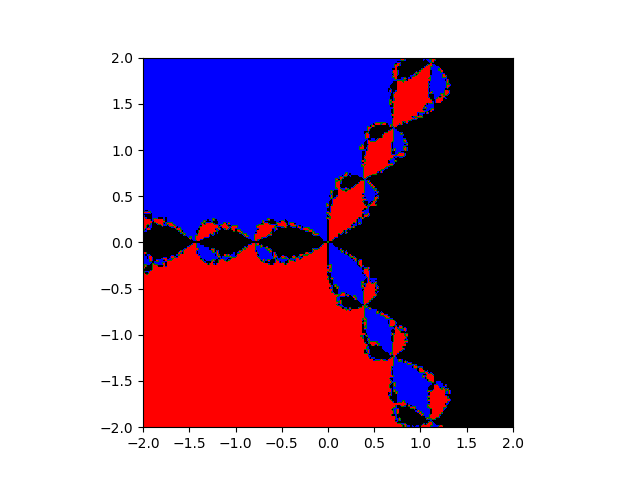

In [49]:
xmin = -2
xmax = 2
ymin = -2
ymax = 2
map = ['r', 'g', 'b', 'k']
cmap = ListedColormap(map)
plt.imshow(CC, cmap=cmap, extent=(xmin, xmax, ymin, ymax))
plt.savefig("img.pdf", format="pdf", bbox_inches="tight")
plt.show()